
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Extended Data Figure 2
-----

In [1]:
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.colors as mc
import matplotlib.patches as patches
import seaborn as sns

import os
import sys

genome_size = 2897.310462
import warnings
warnings.filterwarnings('ignore')

-----
##### Set up input / output directories

In [2]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

-----
##### Load helper scripts

In [3]:
sys.path.append(str(root_dir))
import helper_functions.utils as ut

-----
##### Load & prepare data 

In [4]:
## Load patients metadata
kzm611_md = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_md.tsv'), sep='\t', index_col=0)
low_samples = kzm611_md[kzm611_md.Burden=='low'].index.tolist()

In [5]:
## Load the drivers df
KZM611_drivers_all = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_drivers_CosCGI.tsv'), sep='\t', index_col=0)
KZM611_drivers_all.head(2)

,Hugo_Symbol,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_VAF,amino_acid_change,cdna,Transcript,Tumor_Sample_Barcode,mid,uid,db,driver_type
0,KMT2C,KiCS,hg19,7,151970859,151970859,Missense_Mutation,SNP,C,T,0.039,p.G315S,c.G943A,NM_170606,KiCS0148_319486,7:151970859-151970859,KiCS0148_319486_7:151970859-151970859,COSMIC,exact
1,KRAS,KiCS,hg19,12,25398285,25398285,Missense_Mutation,SNP,C,A,0.439,p.G12C,c.G34T,NM_001369786,KiCS0221_18_2564,12:25398285-25398285,KiCS0221_18_2564_12:25398285-25398285,COSMIC;CGI,exact


In [6]:
## Get driver counts for all & low-burden tumors
drivers_counts_all = ut.get_drivers_table(KZM611_drivers_all, kzm611_md, 'Tumor_Sample_Barcode', burden=None)
drivers_counts_low = ut.get_drivers_table(KZM611_drivers_all, kzm611_md, 'Tumor_Sample_Barcode', burden='low')

In [7]:
low_genes_df = ut.get_drivers_mat(KZM611_drivers_all, kzm611_md, 'Tumor_Sample_Barcode', 'low')
all_genes_df = ut.get_drivers_mat(KZM611_drivers_all, kzm611_md, 'Tumor_Sample_Barcode')

(600, 19)
(1835, 19)


In [8]:
all_pret_samples = kzm611_md[kzm611_md.Therapy=='Pre-Therapy'].index.tolist()
all_post_samples = kzm611_md[kzm611_md.Therapy=='Post-Therapy'].index.tolist()

low_pret_samples = kzm611_md[(kzm611_md.Therapy=='Pre-Therapy') & (kzm611_md.Burden=='low')].index.tolist()
low_post_samples = kzm611_md[(kzm611_md.Therapy=='Post-Therapy') & (kzm611_md.Burden=='low')].index.tolist()

all_pret_dri_samples = [x for x in all_pret_samples if x in KZM611_drivers_all.Tumor_Sample_Barcode.unique().tolist()]
all_post_dri_samples = [x for x in all_post_samples if x in KZM611_drivers_all.Tumor_Sample_Barcode.unique().tolist()]

low_pret_dri_samples = [x for x in low_pret_samples if x in KZM611_drivers_all.Tumor_Sample_Barcode.unique().tolist()]
low_post_dri_samples = [x for x in low_post_samples if x in KZM611_drivers_all.Tumor_Sample_Barcode.unique().tolist()]

In [9]:
dri_dict = {}
for dg in KZM611_drivers_all.Hugo_Symbol.unique():
    subd = KZM611_drivers_all[KZM611_drivers_all.Hugo_Symbol==dg]
    samples = subd.Tumor_Sample_Barcode.unique().tolist()
    all_prets = [x for x in samples if x in all_pret_samples]
    all_posts = [x for x in samples if x in all_post_samples]
    low_prets = [x for x in samples if x in low_pret_samples]
    low_posts = [x for x in samples if x in low_post_samples]

    dri_dict[dg] = [len(low_prets), len(low_posts), len(all_prets), len(all_posts)]

dri_df = pd.DataFrame.from_dict(dri_dict)
dri_df.index = ['low_pret', 'low_post', 'all_pret', 'all_post']
dri_df.head()

,KMT2C,KRAS,MYCN,NSD2,PTPRT,PIK3R1,ALK,HRAS,DICER1,KMT2D,...,RAD51C,CRBN,PLCG2,GNAI2,DIS3,DCC,PTPN12,CRLF2,SOS1,IRF1
low_pret,7,2,3,0,0,3,3,2,3,0,...,0,0,0,1,0,0,0,0,0,0
low_post,20,8,3,1,0,1,6,2,2,10,...,0,0,0,2,0,0,1,1,0,1
all_pret,11,3,5,0,3,9,6,4,7,6,...,1,1,2,1,1,0,0,0,1,0
all_post,23,11,3,2,1,1,8,2,3,12,...,0,0,0,2,0,1,1,1,0,1


In [12]:
all_pret_num = kzm611_md[kzm611_md.Therapy=='Pre-Therapy'].shape[0]
all_post_num = kzm611_md[kzm611_md.Therapy=='Post-Therapy'].shape[0]

low_pret_num = kzm611_md[(kzm611_md.Therapy=='Pre-Therapy') & (kzm611_md.Burden=='low')].shape[0]
low_post_num = kzm611_md[(kzm611_md.Therapy=='Post-Therapy') & (kzm611_md.Burden=='low')].shape[0]

In [13]:
all_genes_2plus = all_genes_df[all_genes_df.Total>2].copy()
all_genes_2plus.columns = [x.replace('-', '\n') if '-' in x else x for x in all_genes_2plus.columns]
all_genes_2p_thr = all_genes_2plus.copy()
all_genes_2p_thr['pret'] = all_genes_2p_thr['Primary\nNaive'] + all_genes_2p_thr['Advanced\nNaive']
all_genes_2p_thr['post'] = all_genes_2p_thr['Primary\nTreated'] + all_genes_2p_thr['Advanced\nTreated']
all_genes_2p_thr.head(3)

,Primary\nNaive,Primary\nTreated,Advanced\nNaive,Advanced\nTreated,Total,Percentage,pret,post
TP53,52,8,0,29,89,15.0,52,37
KMT2C,16,5,0,24,45,7.0,16,29
NF1,29,5,0,10,44,7.0,29,15


In [16]:
low_genes_2plus = low_genes_df[low_genes_df.Total>2].copy()
low_genes_2plus.columns = [x.replace('-', '\n') if '-' in x else x for x in low_genes_2plus.columns]

low_genes_2p_thr = low_genes_2plus.copy()
low_genes_2p_thr['pret'] = low_genes_2p_thr['Primary\nNaive'] + low_genes_2p_thr['Advanced\nNaive']
low_genes_2p_thr['post'] = low_genes_2p_thr['Primary\nTreated'] + low_genes_2p_thr['Advanced\nTreated']
low_genes_2p_thr.head(3)

,Primary\nNaive,Primary\nTreated,Advanced\nNaive,Advanced\nTreated,Total,Percentage,pret,post
TP53,28,8,0,27,63,11.0,28,35
KMT2C,9,5,0,18,32,6.0,9,23
H3F3A,20,0,0,1,21,4.0,20,1


-----
## Panel a

In [20]:
def build_cm_2col(t1, t2):
    colors = [(1, 1, 1)]
    colors.append(tuple([x/256 for x in t1]))
    colors.append(tuple([x/256 for x in t2]))
    n_bins = 80  # Discretizes the interpolation into bins
    cmap_name = 'my_list'
    return mc.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

def build_cm_1col(t1):
    colors = [(1, 1, 1)]
    colors.append(tuple([x/256 for x in t1]))
    n_bins = 20  # Discretizes the interpolation into bins
    cmap_name = 'my_list'
    return mc.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

In [21]:
cm1 = build_cm_1col((49,54,149))
cm2 = build_cm_1col((165,0,38))

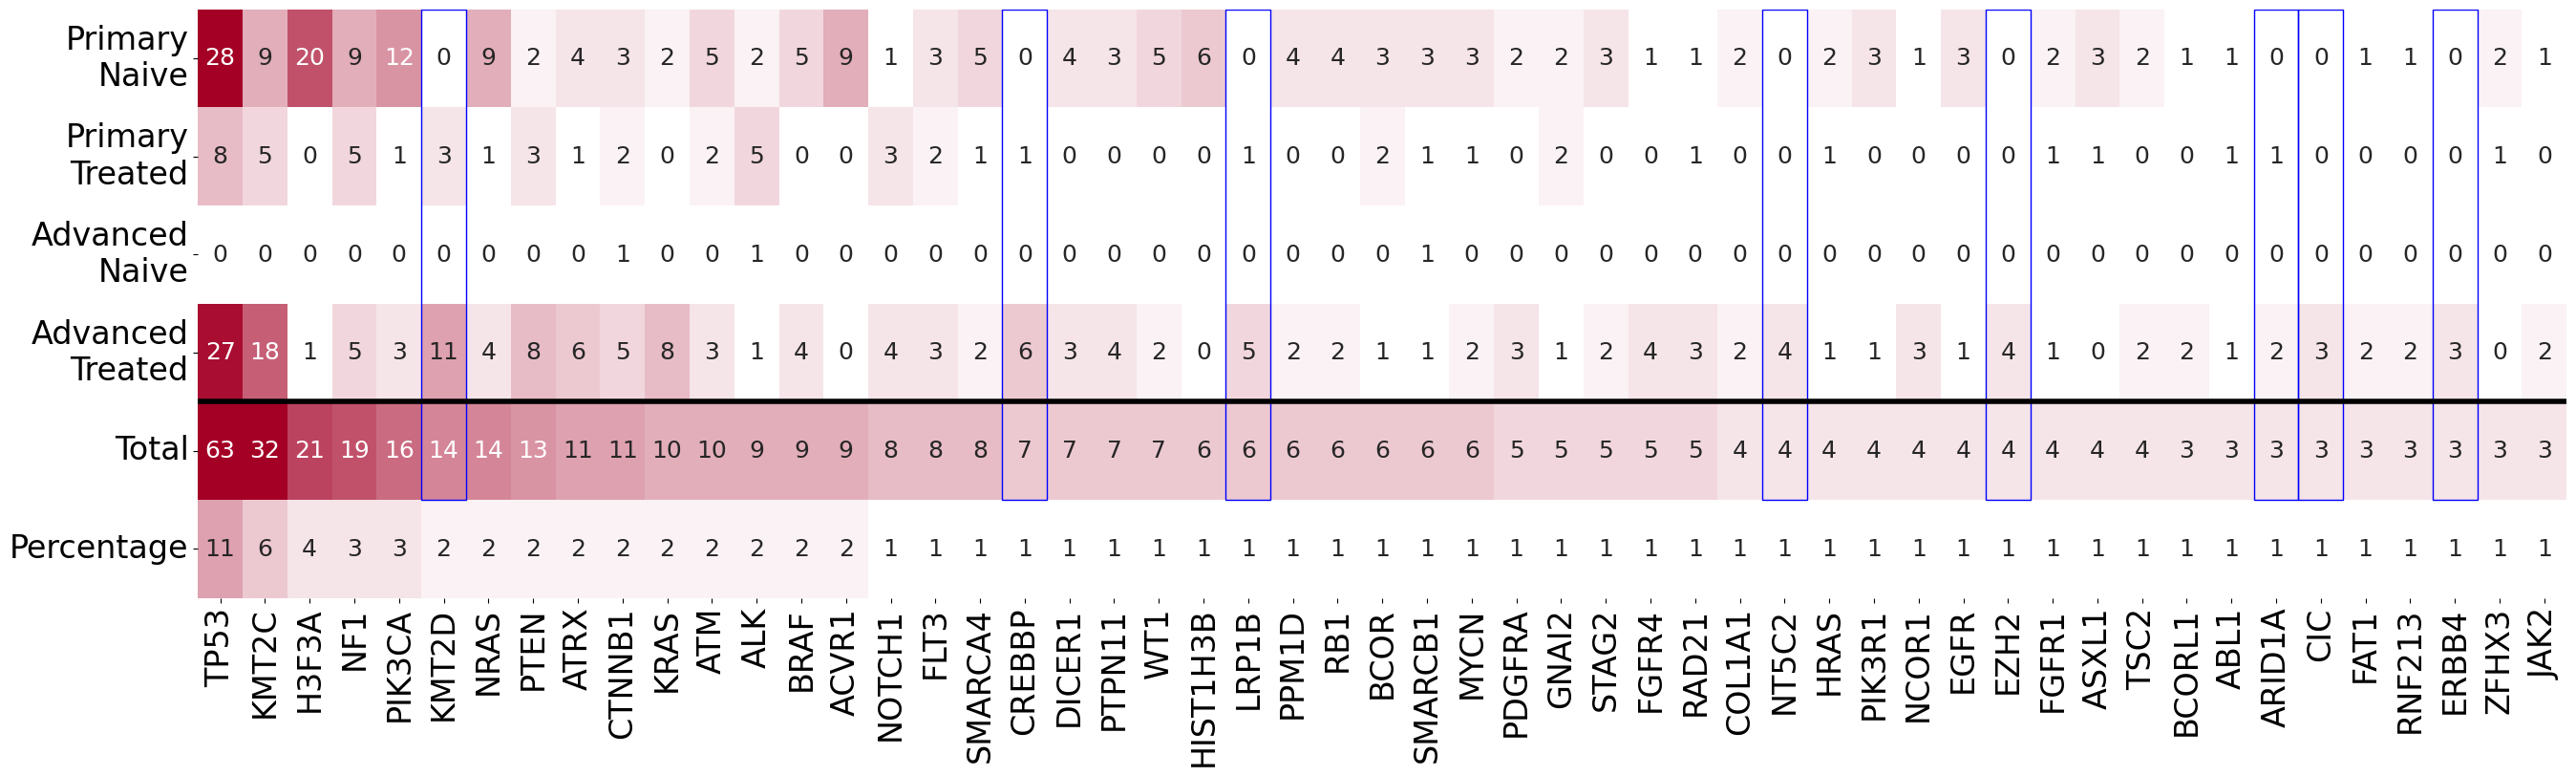

In [22]:
f, axes = plt.subplots(figsize=(32,8))




ax = sns.heatmap(low_genes_2plus.T, cmap=cm2, vmax=29, cbar=False, annot=True, annot_kws={"fontsize":18})
#plt.setp(ax.get_yticklabels(), fontsize=12)
#plt.setp(ax.get_xticklabels(), fontsize=5)

for i in range(low_genes_2plus.shape[0]):
    if low_genes_2plus.iloc[i, 0] + low_genes_2plus.iloc[i, 2] == 0 and low_genes_2plus.iloc[i, -2]>2:
        rect = patches.Rectangle((i, 0), 1, 5, linewidth=1, edgecolor='b', facecolor='none')
        ax.add_patch(rect)    

plt.xticks(fontsize=24)
plt.yticks(fontsize=24, rotation=0)
plt.axhline(4, linewidth=4, color='k')
plt.savefig(os.path.join(fig_out, 'ExFig_2a.pdf'), bbox_inches="tight", dpi=300)

-----
## Panel b

In [23]:
rel_counts, abs_counts = ut.get_drivers_type_state(KZM611_drivers_all, kzm611_md, burden='low')

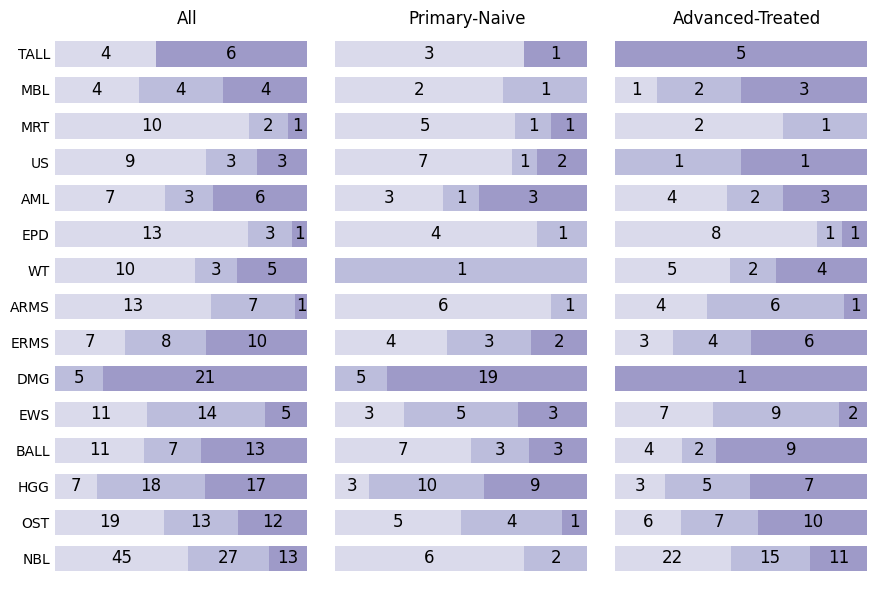

In [24]:
tab20c_cols = sns.color_palette("tab20c")
mycolors = tab20c_cols[-7:-4][::-1]

nrows = 1
ncols = 3

f, axes = plt.subplots(nrows, ncols, figsize=(9,6), sharey=True)

ax0 = rel_counts[rel_counts.Condition=='All'].drop(['Condition'], axis=1).set_index('Type').plot.barh(stacked=True, color=mycolors, title='All', width=0.7, ax=axes[0])
for sp in ax0.spines:
    ax0.spines[sp].set_visible(False)
ax0.tick_params(axis=u'both', which=u'both',length=0)
ax0.xaxis.set_ticklabels([])
ax0.get_legend().remove()
ax0.yaxis.label.set_size(40)
labels2 = [f'{int(i)}' for i in abs_counts[abs_counts.Condition=='All'].drop(['Condition'], axis=1).set_index('Type').to_numpy().flatten(order='F')]
for i, patch in enumerate(ax0.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    if int(labels2[i]) > 0:
        ax0.annotate(labels2[i], (x, y), ha='center', va='center', c='black', fontsize=12)
ax0.set_ylabel('')

ax1 = rel_counts[rel_counts.Condition=='Primary-Naive'].drop(['Condition'], axis=1).set_index('Type').plot.barh(stacked=True, color=mycolors, title='Primary-Naive', width=0.7, ax=axes[1])
for sp in ax1.spines:
    ax1.spines[sp].set_visible(False)
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax1.xaxis.set_ticklabels([])
ax1.get_legend().remove()
ax1.yaxis.label.set_size(40)
labels2 = [f'{int(i)}' for i in abs_counts[abs_counts.Condition=='Primary-Naive'].drop(['Condition'], axis=1).set_index('Type').to_numpy().flatten(order='F')]
for i, patch in enumerate(ax1.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    if int(labels2[i]) > 0:
        ax1.annotate(labels2[i], (x, y), ha='center', va='center', c='black', fontsize=12)

ax4 = rel_counts[rel_counts.Condition=='Advanced-Treated'].drop(['Condition'], axis=1).set_index('Type').plot.barh(stacked=True, color=mycolors, title='Advanced-Treated', width=0.7, ax=axes[2])
for sp in ax4.spines:
    ax4.spines[sp].set_visible(False)
ax4.tick_params(axis=u'both', which=u'both',length=0)
ax4.xaxis.set_ticklabels([])
ax4.get_legend().remove()
labels2 = [f'{int(i)}' for i in abs_counts[abs_counts.Condition=='Advanced-Treated'].drop(['Condition'], axis=1).set_index('Type').to_numpy().flatten(order='F')]
for i, patch in enumerate(ax4.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    if int(labels2[i]) > 0:
        ax4.annotate(labels2[i], (x, y), ha='center', va='center', c='black', fontsize=12)


plt.tight_layout()
plt.savefig(os.path.join(fig_out, 'ExFig_2b.pdf'), bbox_inches="tight")


-----
## Panel c

In [25]:
kmt2d_df = pd.read_csv(os.path.join(root_dir, 'source_data/KMT2D_data.tsv'), sep='\t', index_col=0)

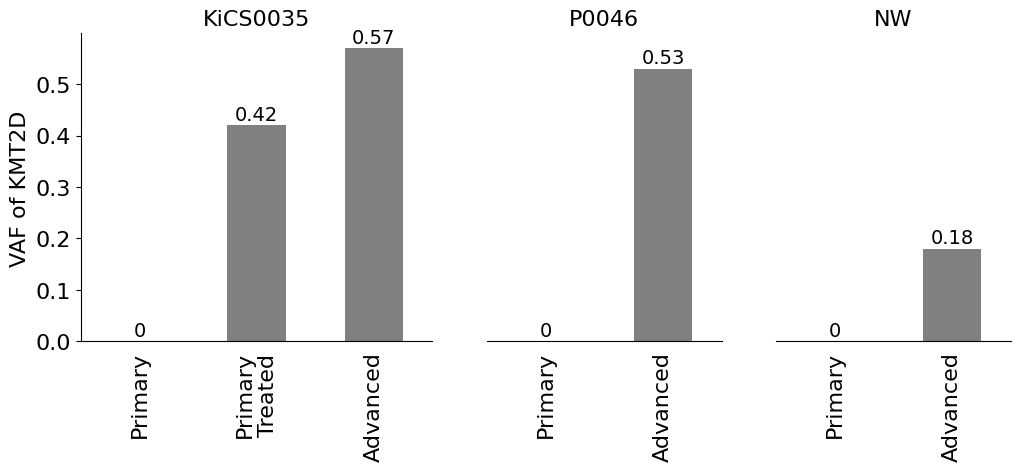

In [26]:
fig, axes = plt.subplots(1,3, figsize=(12, 4), gridspec_kw={'width_ratios': [3, 2, 2]}, sharey=True)
p1 = kmt2d_df.KiCS0035.plot.bar(fontsize=16, ax=axes[0], color='gray')
p2 = kmt2d_df.dropna(axis=0).P0046.plot.bar(fontsize=16, ax=axes[1], color='gray')
p3 = kmt2d_df.dropna(axis=0).NW.plot.bar(fontsize=16, ax=axes[2], color='gray')

p1.set_title('KiCS0035', fontsize=16)
p2.set_title('P0046', fontsize=16)
p3.set_title('NW', fontsize=16)

p1.spines[['right', 'top']].set_visible(False)
p2.spines[['top', 'left', 'right']].set_visible(False)
p3.spines[['top', 'left', 'right']].set_visible(False)

p1.xaxis.set_ticks_position('none')
p2.xaxis.set_ticks_position('none')
p2.yaxis.set_ticks_position('none')
p3.xaxis.set_ticks_position('none')
p3.yaxis.set_ticks_position('none')

p1.set_ylabel('VAF of KMT2D', fontsize=16)


for rect in p1.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value) if y_value == 0 else "{:.2f}".format(y_value)
    p1.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', size=14)

for rect in p2.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value) if y_value == 0 else "{:.2f}".format(y_value)
    p2.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', size=14)

for rect in p3.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value) if y_value == 0 else "{:.2f}".format(y_value)
    p3.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', size=14)

plt.savefig(os.path.join(fig_out, 'ExFig_2c.pdf'), bbox_inches="tight")